<a href="https://colab.research.google.com/github/YasaminRhd/Pythonia.init/blob/main/Session%2010%20%7C%20RNN%20%7C%20GoogleStockPrice%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Dataset import
traning_dataset = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = traning_dataset.iloc[:,1:2].values

test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = test_dataset.iloc[:,1:2].values

Dataset= np.concatenate((training_set, test_set))

In [ ]:
#Scale data into 0-1 range 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = sc.fit_transform(Dataset)

In [ ]:
scaled_dataset

array([[0.08256815],
       [0.09334336],
       [0.0907659 ],
       ...,
       [0.99445131],
       [0.95856378],
       [0.92670354]])

In [ ]:
print(len(training_set))

1258


In [ ]:
print(len(test_set))

20


In [ ]:
print(len(scaled_dataset))

1278


In [ ]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(scaled_dataset[i-60:i, 0:1])
  y_train.append(scaled_dataset[i, 0:1])

x_test = []
y_test = []
for i in range(1258, 1278):
  x_test.append(scaled_dataset[i-60:i, 0:1])
  y_test.append(scaled_dataset[i, 0:1])


In [ ]:
print(len(x_train))

1198


In [ ]:
x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Preparing the sequential model
model = Sequential()

In [ ]:
# LSTM first layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.20))
# LSTM second layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.20))
# LSTM third layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.20))
# LSTM forth layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.20))
# Dense ourput layer
model.add(Dense(units=1))

In [ ]:
# Compile
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit
model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))

Epoch 1/200
60/60 [==============================] - 33s 142ms/step - loss: 0.0450 - val_loss: 0.0054
Epoch 2/200
60/60 [==============================] - 7s 110ms/step - loss: 0.0057 - val_loss: 6.8021e-04
Epoch 3/200
60/60 [==============================] - 7s 108ms/step - loss: 0.0059 - val_loss: 5.6549e-04
Epoch 4/200
60/60 [==============================] - 6s 107ms/step - loss: 0.0048 - val_loss: 4.9594e-04
Epoch 5/200
60/60 [==============================] - 6s 105ms/step - loss: 0.0055 - val_loss: 5.3924e-04
Epoch 6/200
60/60 [==============================] - 6s 105ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 7/200
60/60 [==============================] - 6s 107ms/step - loss: 0.0040 - val_loss: 7.3945e-04
Epoch 8/200
60/60 [==============================] - 6s 106ms/step - loss: 0.0038 - val_loss: 4.8411e-04
Epoch 9/200
60/60 [==============================] - 6s 106ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 10/200
60/60 [==============================] - 6s 107ms/ste

In [ ]:
# Making prediction for the test data
y_pred = model.predict(x_test)

In [ ]:
# Inverse the Scaling 
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)

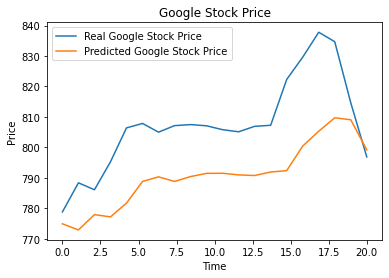

In [ ]:
# Visualizeing the data
xAxis = np.linspace(0, 20, 20)
plt.plot(xAxis, y_test, label='Real Google Stock Price')
plt.plot(xAxis, y_pred, label='Predicted Google Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()